# XOR con MLP y anneling

Entrenamos un perceptrón multicapa (2-2-1) para resolver XOR optimizando los pesos con simulated annealing.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

## Datos XOR

In [3]:
X = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y = np.array([0.0, 1.0, 1.0, 0.0])

## MLP y función de error

In [4]:
def unpack_params(params):
    w1 = params[:4].reshape(2, 2)
    b1 = params[4:6]
    w2 = params[6:8].reshape(2, 1)
    b2 = params[8]
    return w1, b1, w2, b2

def forward_mlp(x, params):
    w1, b1, w2, b2 = unpack_params(params)
    hidden = np.tanh(x @ w1 + b1)
    out = 1.0 / (1.0 + np.exp(-(hidden @ w2 + b2)))
    return out.squeeze()

def mse(params):
    preds = forward_mlp(X, params)
    return np.mean((preds - y) ** 2)

In [5]:
def simulated_annealing(iterations=5000, initial_temp=1.0, cooling=0.995, step_std=0.1):
    params = np.random.uniform(-1, 1, size=9)
    current_error = mse(params)
    best_params = params.copy()
    best_error = current_error
    errors = []
    temp = initial_temp

    for i in range(iterations):
        candidate = params + np.random.normal(0, step_std, size=params.shape)
        candidate_error = mse(candidate)
        delta = candidate_error - current_error
        if delta < 0 or np.exp(-delta / temp) > np.random.rand():
            params = candidate
            current_error = candidate_error
            if candidate_error < best_error:
                best_error = candidate_error
                best_params = candidate.copy()
        errors.append(current_error)
        temp *= cooling
    return best_params, best_error, errors

best_params, best_error, errors = simulated_annealing()
print(f"Error final: {best_error:.6f}")
print("Predicciones:", np.round(forward_mlp(X, best_params), 3))
print("Salidas discretizadas:", (forward_mlp(X, best_params) > 0.5).astype(int))

Error final: 0.125002
Predicciones: [0.001 1.    0.5   0.5  ]
Salidas discretizadas: [0 1 1 1]


## Evolución del error

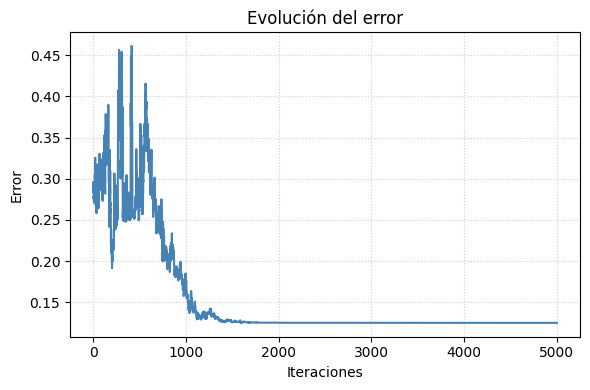

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(errors, color='steelblue')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Evolución del error')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()